In [1]:
#@title Load Dataset
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path='/content/drive/MyDrive/Dataset/Loan_Default.csv'
df=pd.read_csv(path)
df.sample(10), df.columns.tolist()


(            ID  year loan_limit             Gender approv_in_adv loan_type  \
 97238   122128  2019        ncf              Joint           pre     type3   
 101175  126065  2019         cf               Male         nopre     type1   
 26389    51279  2019         cf              Joint         nopre     type3   
 64912    89802  2019         cf  Sex Not Available         nopre     type1   
 138801  163691  2019         cf               Male         nopre     type2   
 48866    73756  2019        NaN               Male         nopre     type1   
 88688   113578  2019         cf  Sex Not Available         nopre     type2   
 131363  156253  2019         cf               Male         nopre     type1   
 56079    80969  2019         cf              Joint         nopre     type1   
 102389  127279  2019        ncf  Sex Not Available         nopre     type1   
 
        loan_purpose Credit_Worthiness open_credit business_or_commercial  ...  \
 97238            p1                l1        n

| Column                          | Description                                                           |
| ------------------------------- | --------------------------------------------------------------------- |
| **ID**                          | Unique identifier for each loan application.                          |
| **year**                        | The year the loan was applied for.                                    |
| **loan\_limit**                 | Whether the loan was under a limit category like 'cf' (Conforming).   |
| **Gender**                      | Applicant’s gender or profile (`Male`, `Joint`, `Sex Not Available`). |
| **approv\_in\_adv**             | Was the loan pre-approved? (`pre`, `nopre`).                          |
| **loan\_type**                  | Type/category of the loan product (`type1`, `type2`, etc.).           |
| **loan\_purpose**               | Reason for the loan (e.g., `p1`, `p4`). Encoded.                      |
| **Credit\_Worthiness**          | Applicant’s credit status, usually based on a rule (`l1`, `l2`).      |
| **open\_credit**                | Whether the applicant has open lines of credit (`nopc` = none open).  |
| **business\_or\_commercial**    | Whether loan is for business/commercial use (`b/c`, `nob/c`).         |
| **loan\_amount**                | Total loan amount requested.                                          |
| **rate\_of\_interest**          | Interest rate on the loan.                                            |
| **Interest\_rate\_spread**      | Spread above the benchmark rate.                                      |
| **Upfront\_charges**            | Any upfront costs or fees charged.                                    |
| **term**                        | Duration of the loan in months or years.                              |
| **Neg\_ammortization**          | Whether negative amortization is allowed (`y`, `n`).                  |
| **interest\_only**              | Whether it’s an interest-only loan initially.                         |
| **lump\_sum\_payment**          | Whether lump-sum payments are part of the terms.                      |
| **property\_value**             | Assessed or declared value of the property.                           |
| **construction\_type**          | Type of construction involved (`ct1`, `ct2`, etc.).                   |
| **occupancy\_type**             | Whether owner-occupied, rental, etc.                                  |
| **Secured\_by**                 | Whether the loan is secured by real estate or other assets.           |
| **total\_units**                | Number of housing units tied to the loan (e.g., duplex = 2).          |
| **income**                      | Applicant’s reported income.                                          |
| **credit\_type**                | Credit score source agency (`EXP`, `EQUI`, `CRIF`, etc.).             |
| **Credit\_Score**               | Numerical credit score of the applicant.                              |
| **co-applicant\_credit\_type**  | Credit source for the co-applicant (if any).                          |
| **age**                         | Age group of applicant (e.g., `25-34`, `45-54`).                      |
| **submission\_of\_application** | Whether submitted online, in-person, etc.                             |
| **LTV**                         | Loan-to-Value ratio (loan amount / property value × 100).             |
| **Region**                      | Geographical region (e.g., `North`, `south`).                         |
| **Security\_Type**              | Type of collateral (`direct`, etc.).                                  |
| **Status**                      | **Target variable** – likely 1 = Defaulted, 0 = Repaid.               |
| **dtir1**                       | Debt-to-Income Ratio – key feature for affordability analysis.        |


In [2]:
#@title Column Summary
def column_summary(df):
    summary_data = []

    for col_name in df.columns:
        col_dtype = df[col_name].dtype
        num_of_nulls = df[col_name].isnull().sum()
        num_of_non_nulls = df[col_name].notnull().sum()
        num_of_distinct_values = df[col_name].nunique()

        if num_of_distinct_values <= 10:
            distinct_values_counts = df[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = df[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })

    summary_df = pd.DataFrame(summary_data)
    return summary_df

summary_df = column_summary(df)
display(summary_df)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,ID,int64,0,148670,148670,"{173559: 1, 24890: 1, 24891: 1, 24892: 1, 2489..."
1,year,int64,0,148670,1,{2019: 148670}
2,loan_limit,object,3344,145326,2,"{'cf': 135348, 'ncf': 9978}"
3,Gender,object,0,148670,4,"{'Male': 42346, 'Joint': 41399, 'Sex Not Avail..."
4,approv_in_adv,object,908,147762,2,"{'nopre': 124621, 'pre': 23141}"
5,loan_type,object,0,148670,3,"{'type1': 113173, 'type2': 20762, 'type3': 14735}"
6,loan_purpose,object,134,148536,4,"{'p3': 55934, 'p4': 54799, 'p1': 34529, 'p2': ..."
7,Credit_Worthiness,object,0,148670,2,"{'l1': 142344, 'l2': 6326}"
8,open_credit,object,0,148670,2,"{'nopc': 148114, 'opc': 556}"
9,business_or_commercial,object,0,148670,2,"{'nob/c': 127908, 'b/c': 20762}"


In [3]:
#@title Numeric Columns
# Select numeric columns (e.g., int64, float64)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Numeric Columns:", numeric_columns)

Numeric Columns: Index(['ID', 'year', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',
       'LTV', 'Status', 'dtir1'],
      dtype='object')


In [4]:
#@title Categorical colunms
# Select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region', 'Security_Type'],
      dtype='object')


In [5]:
#@title Data Cleaning
# Create a copy of the dataset for cleaning
df_clean = df.copy()

# Normalize categorical text (strip + lowercase)
for col in categorical_columns:
    df_clean[col] = df_clean[col].astype(str).str.strip().str.lower()

print('Done✅')

Done✅


In [6]:
# Remove exact duplicate rows
df_clean.drop_duplicates()
print('Done✅')

Done✅


In [7]:
# Fix common known typos
df_clean['Security_Type'] = df_clean['Security_Type'].replace({'indriect': 'indirect'})
print('Done✅')

Done✅


In [8]:
# Imputing missing values
import numpy as np
from sklearn.impute import SimpleImputer

# Identify column types
cat_cols = df_clean.select_dtypes(include='object').columns.tolist()
num_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Replace common string-based missing values with np.nan
df_clean[cat_cols] = df_clean[cat_cols].replace(['NaN', 'nan', '', 'missing'], np.nan)

# Impute categorical columns with most frequent (mode)
if cat_cols:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    df_clean[cat_cols] = pd.DataFrame(
        cat_imputer.fit_transform(df_clean[cat_cols]),
        columns=cat_cols,
        index=df_clean.index
    )

# Impute numeric columns with median
if num_cols:
    num_imputer = SimpleImputer(strategy='median')
    df_clean[num_cols] = pd.DataFrame(
        num_imputer.fit_transform(df_clean[num_cols]),
        columns=num_cols,
        index=df_clean.index
    )
    print('Done✅')

Done✅


In [9]:
# Create numerical midpoints for age ranges
age_map = {
    '25-34': 29.5,
    '35-44': 39.5,
    '45-54': 49.5,
    '55-64': 59.5,
    '65-74': 69.5,
    '>74': 79.5,
    '<25': 24
}

df_clean['age_midpoint'] = df_clean['age'].map(age_map)
print('Done✅')

Done✅


In [10]:
df_clean['Gender'] = df_clean['Gender'].replace({
    'male': 'Male',
    'female': 'Female',
    'sex not available': 'Unknown',
    'joint': 'Unknown'
})
print('Done✅')

Done✅


In [11]:
# Drop columns with extremely high cardinality or redundancy
drop_columns = ['ID', 'year','age']  # ID is unique, year is constant
df_clean.drop(columns=drop_columns, inplace=True)
print('Done✅')

Done✅


In [12]:
#@title Column Summary of the cleaned dataset
summary_df = column_summary(df_clean)
display(summary_df)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,loan_limit,object,0,148670,2,"{'cf': 138692, 'ncf': 9978}"
1,Gender,object,0,148670,3,"{'Unknown': 79058, 'Male': 42346, 'Female': 27..."
2,approv_in_adv,object,0,148670,2,"{'nopre': 125529, 'pre': 23141}"
3,loan_type,object,0,148670,3,"{'type1': 113173, 'type2': 20762, 'type3': 14735}"
4,loan_purpose,object,0,148670,4,"{'p3': 56068, 'p4': 54799, 'p1': 34529, 'p2': ..."
5,Credit_Worthiness,object,0,148670,2,"{'l1': 142344, 'l2': 6326}"
6,open_credit,object,0,148670,2,"{'nopc': 148114, 'opc': 556}"
7,business_or_commercial,object,0,148670,2,"{'nob/c': 127908, 'b/c': 20762}"
8,loan_amount,float64,0,148670,211,"{206500.0: 4610, 256500.0: 4079, 156500.0: 396..."
9,rate_of_interest,float64,0,148670,131,"{3.99: 50894, 3.625: 8800, 3.875: 8592, 3.75: ..."


In [13]:
#@title Statistical Analysis
import scipy.stats as stats
from pandas import set_option

def distribution_statistics(df):
    results = []
    for column in df.select_dtypes(include=[np.number]).columns:
        mean = df[column].mean()
        median = df[column].median()
        mode = df[column].mode()[0] if not df[column].empty else np.nan
        std_dev = df[column].std()
        variance = df[column].var()
        range_val = df[column].max() - df[column].min()
        skewness_val = stats.skew(df[column], nan_policy='omit')
        kurtosis_val = stats.kurtosis(df[column], nan_policy='omit')

        results.append({
            'Parameter': column,
            'Mean': mean,
            'Median': median,
            'Mode': mode,
            'Standard Deviation': std_dev,
            'Variance': variance,
            'Range': range_val,
            'Skewness': skewness_val,
            'Kurtosis': kurtosis_val,
        })

    result_df = pd.DataFrame(results)
    return result_df

# Display the results
display(distribution_statistics(df_clean))
set_option('display.max_columns', 10)
set_option('display.float_format', lambda x: '%.2f' % x)

,Parameter,Mean,Median,Mode,Standard Deviation,Variance,Range,Skewness,Kurtosis
0,loan_amount,331117.743997,296500.00000,206500.00000,183909.310127,3.382263e+10,3.560000e+06,1.666981,9.127428
1,rate_of_interest,4.031879,3.99000,3.99000,0.488348,2.384833e-01,8.000000e+00,0.528620,1.463512
2,Interest_rate_spread,0.429024,0.39040,0.39040,0.445907,1.988328e-01,6.995000e+00,0.406870,0.760482
3,Upfront_charges,3057.397919,2596.45000,2596.45000,2797.972965,7.828653e+06,6.000000e+04,2.194908,10.028642
4,term,335.143438,360.00000,360.00000,58.402488,3.410851e+03,2.640000e+02,-2.175268,3.175206
5,property_value,489779.982512,418000.00000,418000.00000,342022.063957,1.169791e+11,1.650000e+07,4.872281,81.450232
6,income,6883.647811,5760.00000,5760.00000,6300.067060,3.969084e+07,5.785800e+05,17.844818,940.403642
7,Credit_Score,699.789103,699.00000,763.00000,115.875857,1.342721e+04,4.000000e+02,0.004767,-1.202649
8,LTV,72.989111,75.13587,75.13587,37.890714,1.435706e+03,7.830283e+03,127.159755,22217.442705
9,Status,0.246445,0.00000,0.00000,0.430942,1.857112e-01,1.000000e+00,1.176750,-0.615259


🔹 1. loan_amount, Upfront_charges, property_value

Right-skewed: Skewness > 1

High kurtosis: Heavy tails (e.g. property_value = 81.45!)

🔁 Recommendation: Apply log1p() transformation to reduce skew and normalize

🔹 2. income

Extremely right-skewed: Skew = 17.84

Very high kurtosis: 940.4 → extreme outliers

🔁 Recommendation: Log transform and possibly cap values at 99th percentile

🔹 3. term

Negative skew: -2.18 → most values around 360

🔁 Recommendation: Consider converting to categorical: 'standard' vs 'non-standard'

🔹 4. LTV

Extreme skew and kurtosis (127.16, 22,217.44)

🔁 Recommendation: Cap values at 100–120%, validate if >100% is meaningful

🔹 5. Credit_Score, dtir1, age_midpoint

Relatively normal distribution


In [14]:
#@title Transforming some columns for better model perfomance

# Create a copy for transformations
df_transformed = df_clean.copy()

# 1. Log-transform right-skewed features
log_transform_cols = ['loan_amount', 'Upfront_charges', 'property_value', 'income']
for col in log_transform_cols:
    df_transformed[col] = df_transformed[col].apply(lambda x: np.log1p(x) if x > 0 else 0)

# 2. Cap income at 99th percentile
income_cap = df_clean['income'].quantile(0.99)
df_transformed['income'] = np.clip(df_clean['income'], 0, income_cap)

# 3. Cap LTV at 120
df_transformed['LTV'] = np.clip(df_clean['LTV'], 0, 120)

# 4. Convert term to binary categorical: standard vs non-standard
df_transformed['term_group'] = df_clean['term'].apply(lambda x: 'standard' if x == 360 else 'non-standard')

# Display preview
df_transformed[['loan_amount', 'Upfront_charges', 'property_value', 'income', 'LTV', 'term_group']].head()


,loan_amount,Upfront_charges,property_value,income,LTV,term_group
0,11.67,7.86,11.68,1740.00,98.73,standard
1,12.24,7.86,12.94,4980.00,75.14,standard
2,12.92,6.39,13.14,9480.00,80.02,standard
3,13.03,7.86,13.40,11880.00,69.38,standard
4,13.45,0.00,13.54,10440.00,91.89,standard


In [15]:
df_transformed

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,...,Security_Type,Status,dtir1,age_midpoint,term_group
0,cf,Unknown,nopre,type1,p1,...,direct,1.00,45.00,29.50,standard
1,cf,Male,nopre,type2,p1,...,direct,1.00,39.00,59.50,standard
2,cf,Male,pre,type1,p1,...,direct,0.00,46.00,39.50,standard
3,cf,Male,nopre,type1,p4,...,direct,0.00,42.00,49.50,standard
4,cf,Unknown,pre,type1,p1,...,direct,0.00,39.00,29.50,standard
...,...,...,...,...,...,...,...,...,...,...,...
148665,cf,Unknown,nopre,type1,p3,...,direct,0.00,48.00,59.50,non-standard
148666,cf,Male,nopre,type1,p1,...,direct,0.00,15.00,29.50,standard
148667,cf,Male,nopre,type1,p4,...,direct,0.00,49.00,49.50,non-standard
148668,cf,Female,nopre,type1,p4,...,direct,0.00,29.00,59.50,non-standard


In [16]:
#@title EDA

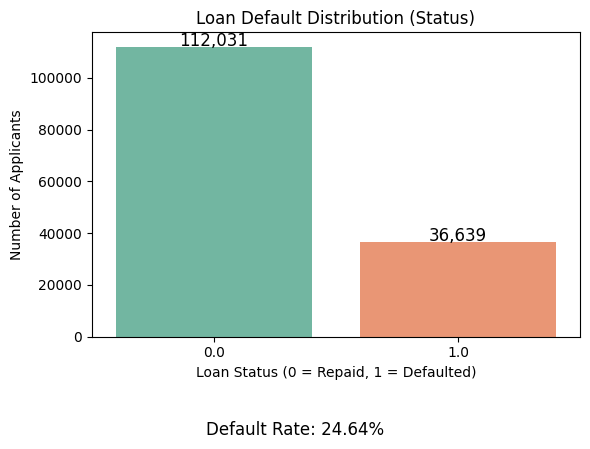

In [17]:
#@title Target Distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Count values in Status
status_counts = df_transformed['Status'].value_counts()
default_rate = df_transformed['Status'].mean() * 100

# Plot
plt.figure(figsize=(6, 4))
sns.countplot(x='Status', data=df_transformed, palette='Set2')
plt.title('Loan Default Distribution (Status)')
plt.xlabel('Loan Status (0 = Repaid, 1 = Defaulted)')
plt.ylabel('Number of Applicants')

# Add value labels
for i, count in enumerate(status_counts):
    plt.text(i, count + 500, f"{count:,}", ha='center', fontsize=12)

# Show
plt.figtext(0.5, -0.1, f"Default Rate: {default_rate:.2f}%", ha="center", fontsize=12)
plt.tight_layout()
plt.show()

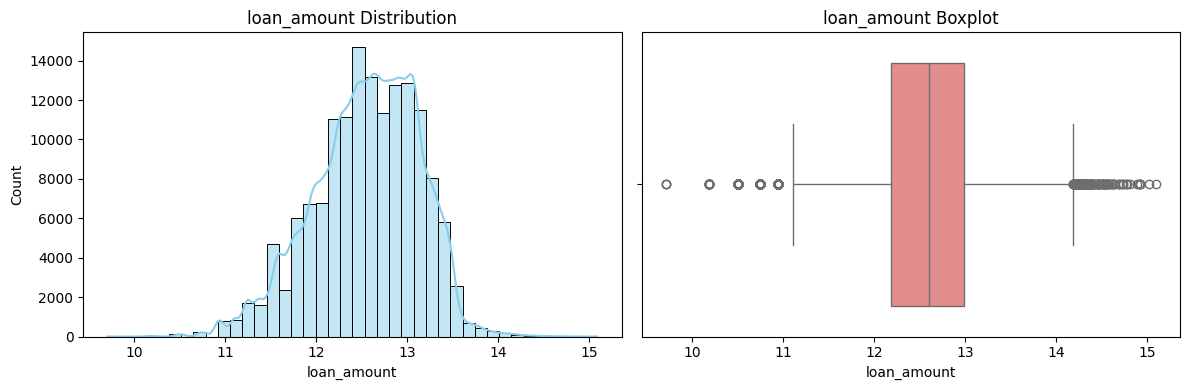

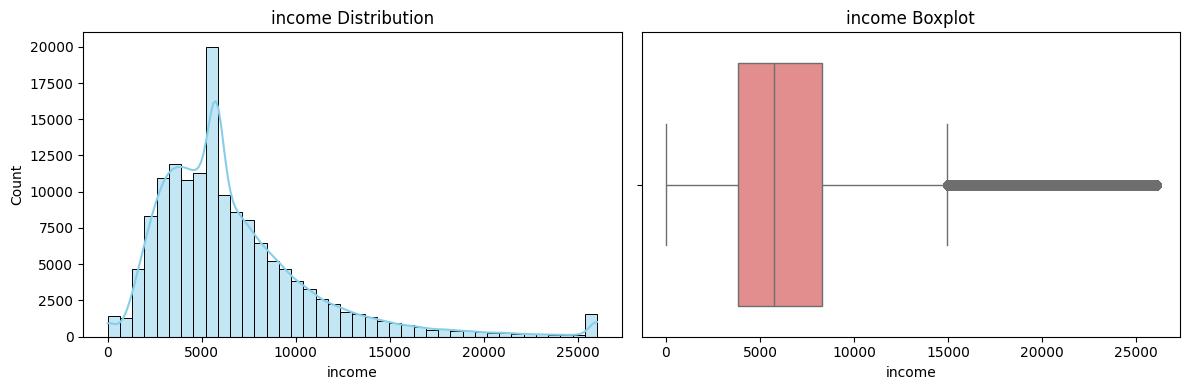

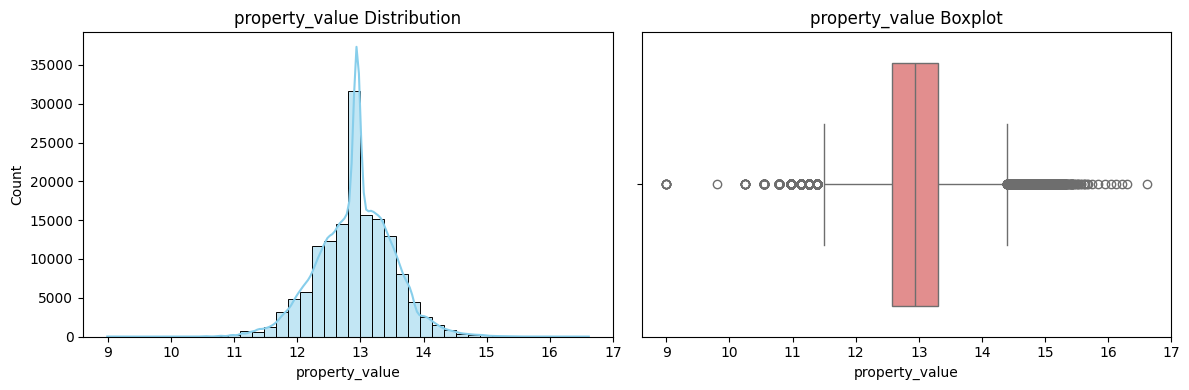

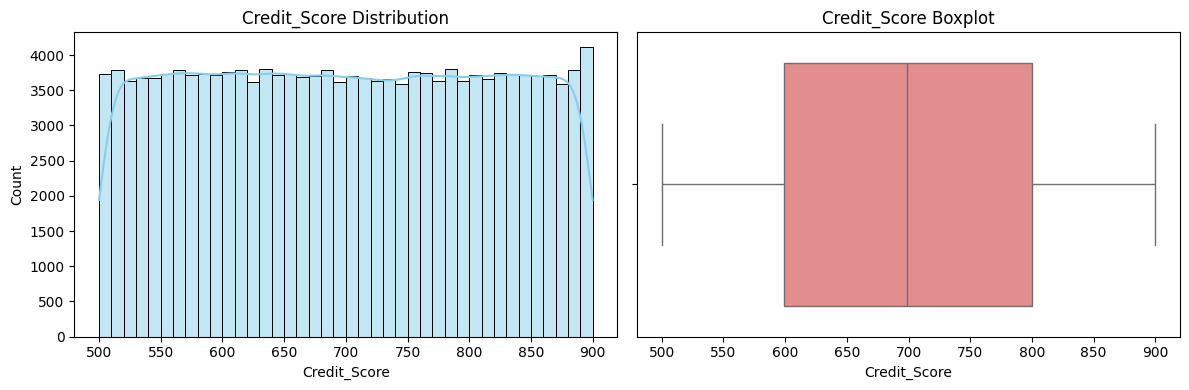

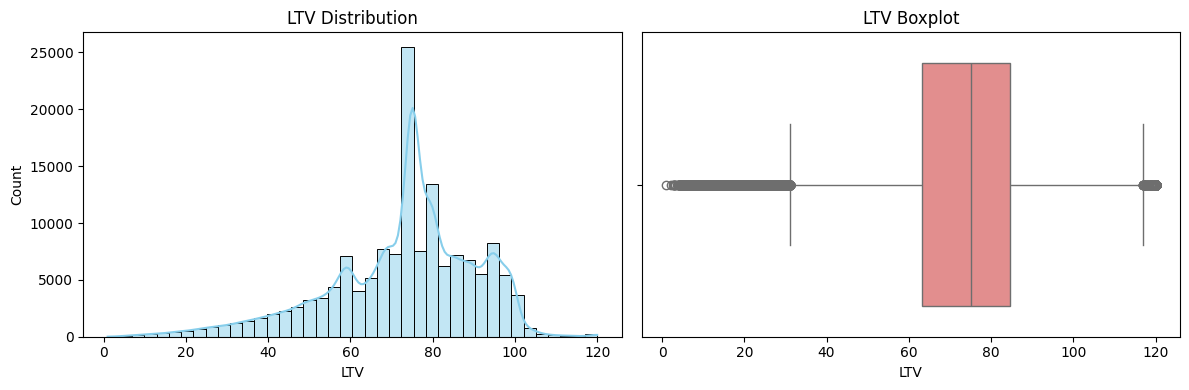

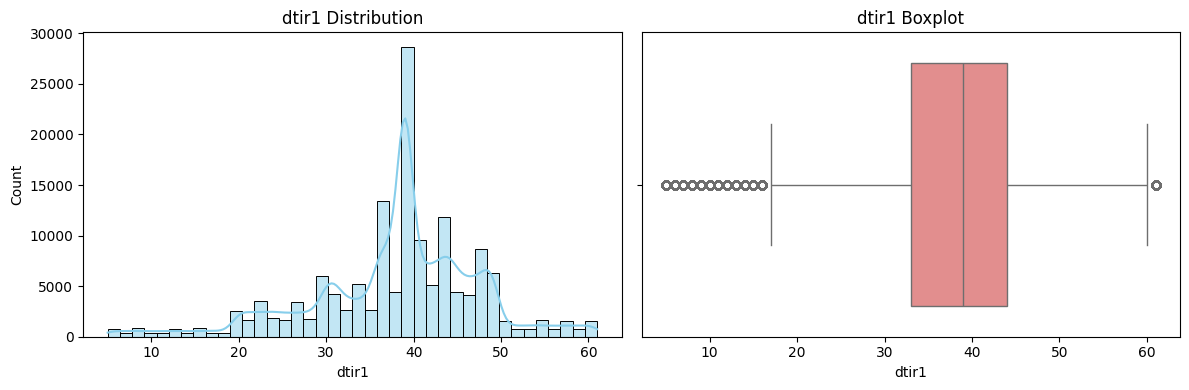

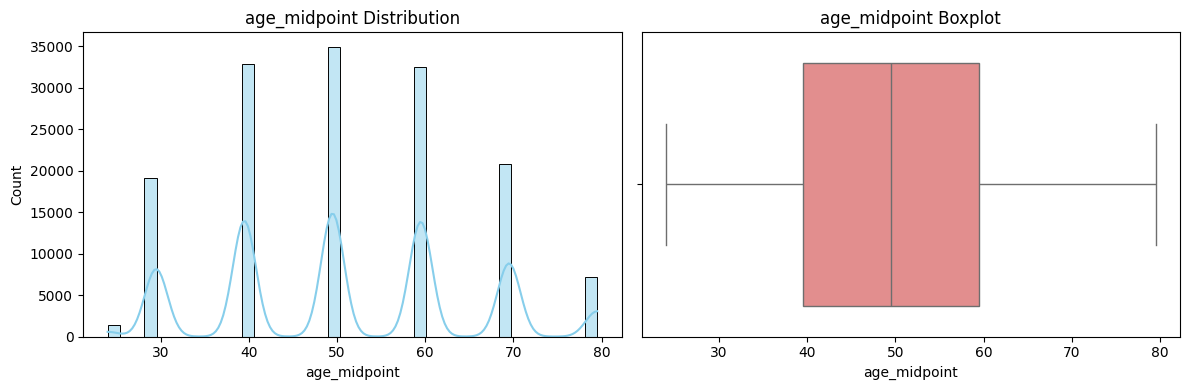

In [18]:
#@title Univariate Distribution Analysis
# List of numerical features to explore
num_cols = ['loan_amount', 'income', 'property_value', 'Credit_Score', 'LTV', 'dtir1', 'age_midpoint']

# Plot histogram and boxplot for each feature
for col in num_cols:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    # Histogram with KDE
    sns.histplot(df_transformed[col], bins=40, kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'{col} Distribution')

    # Boxplot
    sns.boxplot(x=df_transformed[col], ax=axes[1], color='lightcoral')
    axes[1].set_title(f'{col} Boxplot')

    plt.tight_layout()
    plt.show()


In [19]:
#@title Bivariate Analysis

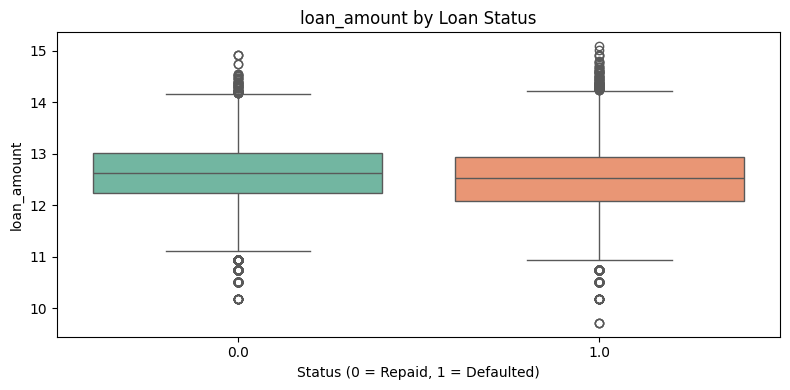

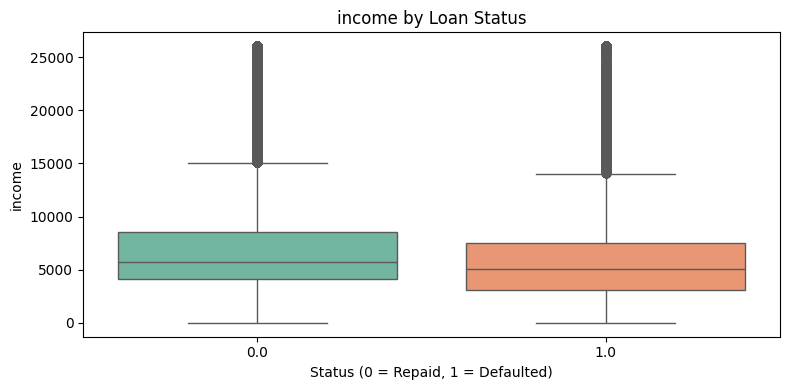

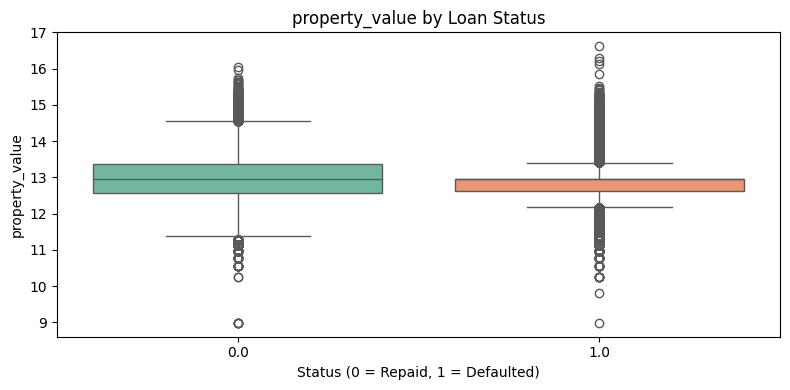

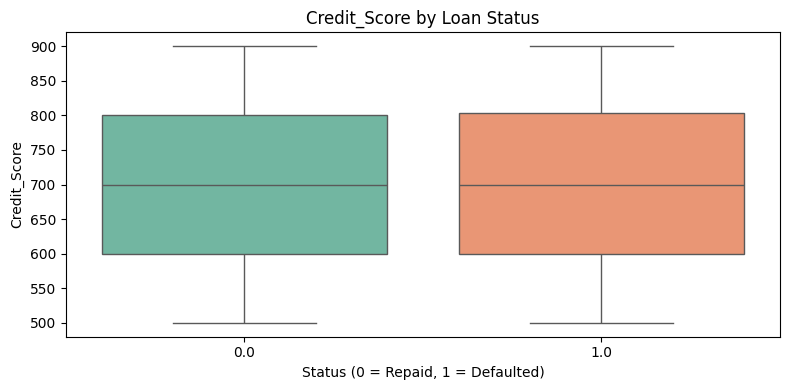

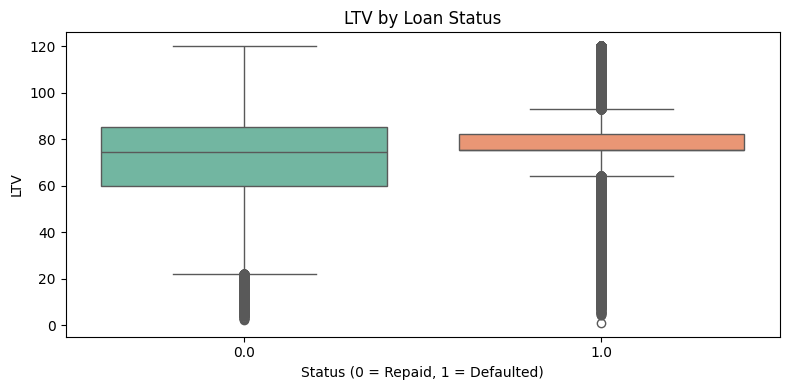

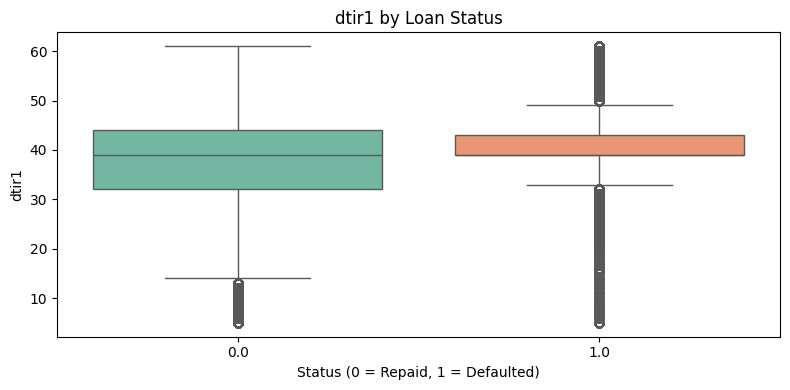

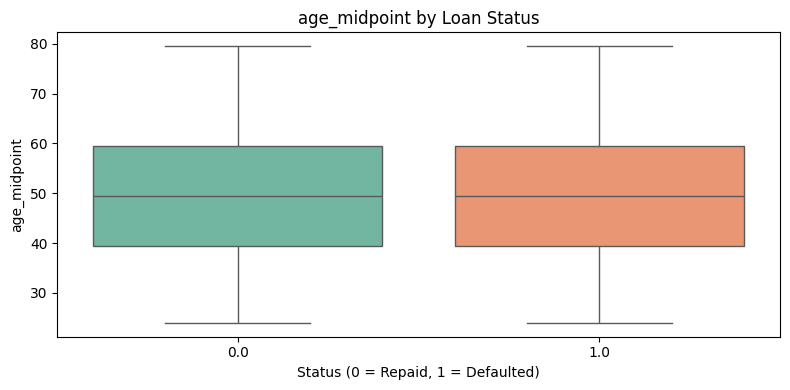

In [20]:
#@title Feature vs Status (Target)

# List of key numerical features
num_features = ['loan_amount', 'income', 'property_value', 'Credit_Score', 'LTV', 'dtir1', 'age_midpoint']

# Boxplots grouped by loan status
import seaborn as sns
import matplotlib.pyplot as plt

for col in num_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Status', y=col, data=df_transformed, palette='Set2')
    plt.title(f'{col} by Loan Status')
    plt.xlabel('Status (0 = Repaid, 1 = Defaulted)')
    plt.tight_layout()
    plt.show()


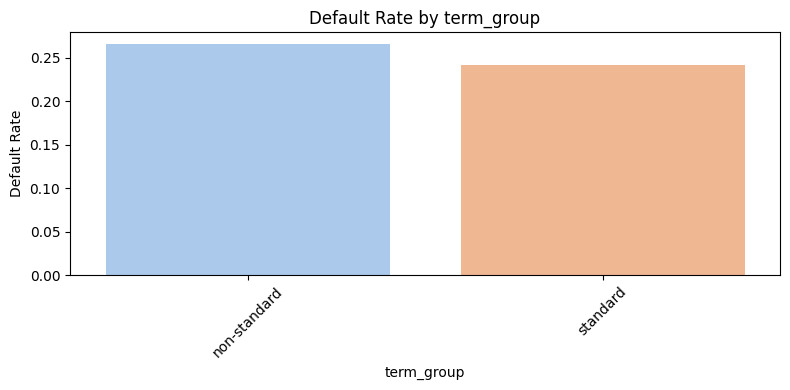

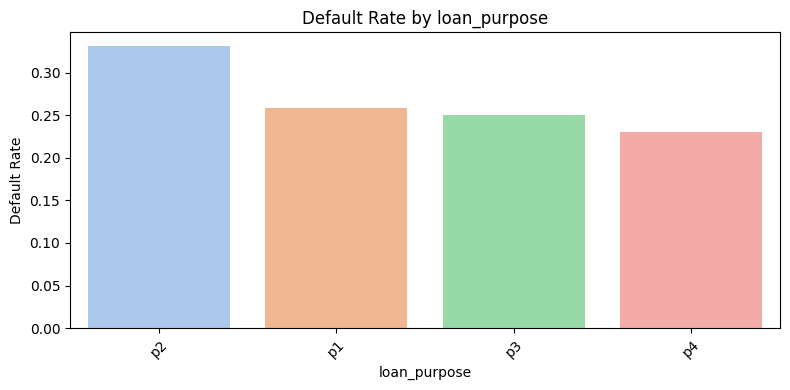

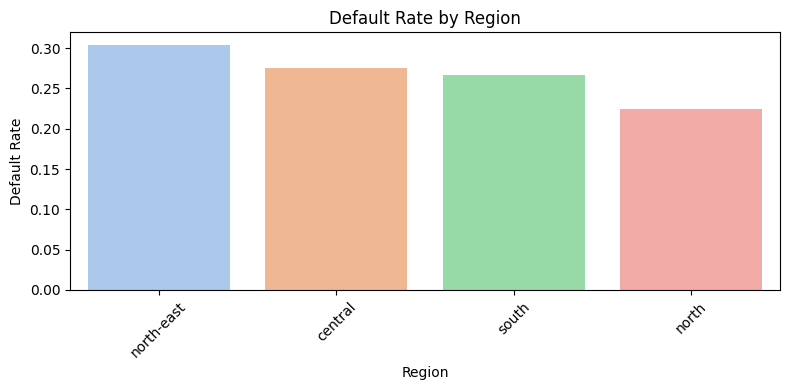

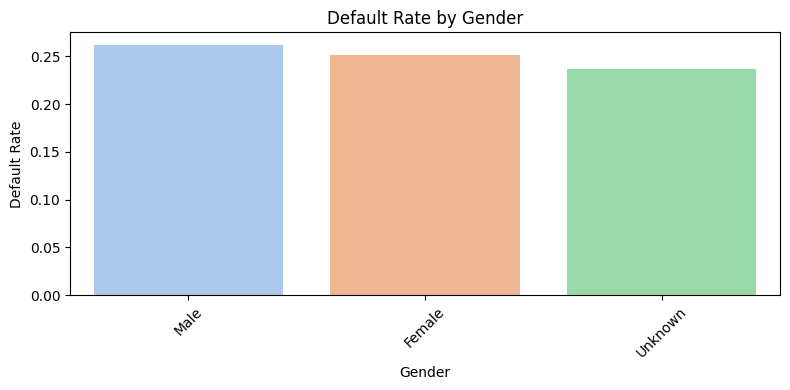

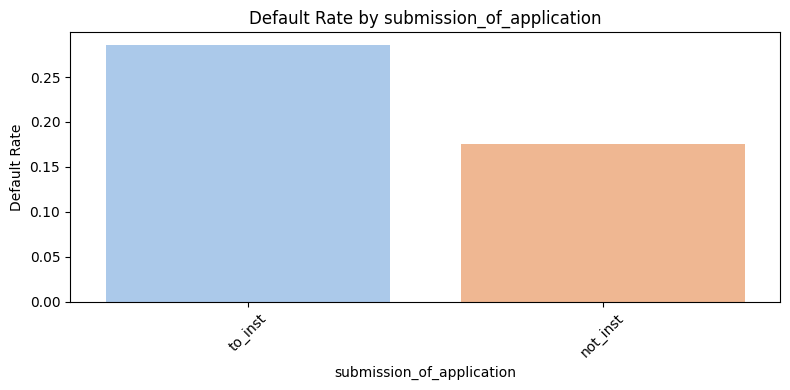

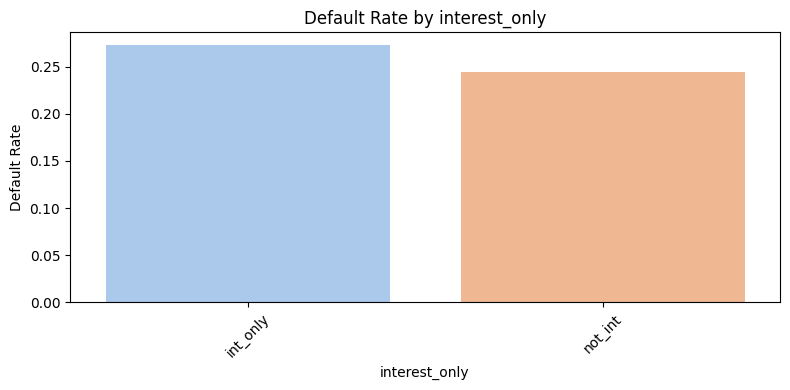

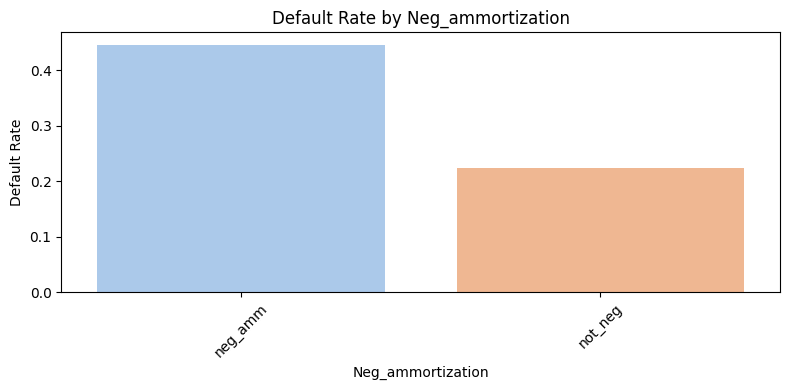

In [21]:
# List of important categorical features
cat_features = ['term_group', 'loan_purpose', 'Region', 'Gender',
                'submission_of_application', 'interest_only', 'Neg_ammortization']

for col in cat_features:
    plt.figure(figsize=(8, 4))
    rate_df = df_transformed.groupby(col)['Status'].mean().reset_index().sort_values('Status', ascending=False)
    sns.barplot(x=col, y='Status', data=rate_df, palette='pastel')
    plt.title(f'Default Rate by {col}')
    plt.ylabel('Default Rate')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


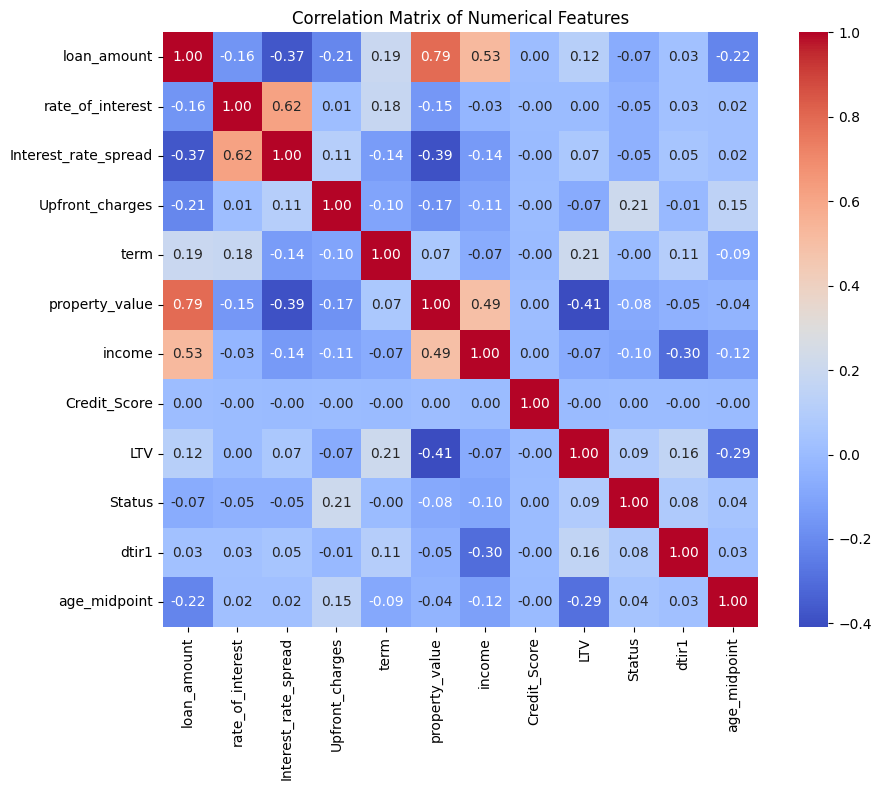

In [22]:
#@title Correlations
# Only numerical columns
numeric_data = df_transformed.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()


The correlation matrix of numerical features highlights the relationships between variables:

- Strong Positive Correlations: Loan amount has a strong positive correlation with property value (0.79) and income (0.53). Age midpoint shows a strong positive correlation with dti ratio (0.22).

- Moderate Positive Correlations: Rate of interest correlates with interest rate spread (0.62) and upfront charges (0.11). Property value correlates with income (0.49).

- Strong Negative Correlations: Age midpoint has a notable negative correlation with LTV (-0.22). Dti ratio shows a strong negative correlation with income (-0.30).

- Weak or No Correlations: Credit Score shows minimal correlation with other features (all near 0), indicating independence. Status and LTV have weak correlations with most variables.

Key insights include the interdependence of loan amount with property value and income, and the inverse relationship between age midpoint and LTV.

In [23]:
#@title Reducinging Dimensionality with Feature Selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Copy transformed dataset
df_selected = df_transformed.copy()

# Drop rows with missing target, if any
df_selected = df_selected[df_selected['Status'].notnull()]

# Separate features and target
X = df_selected.drop(columns=['Status'])
y = df_selected['Status']

# Encode all categorical variables using LabelEncoder for RFE (basic encoding)
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include='object').columns:
    X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col])

# Initialize model and RFE
estimator = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=estimator, n_features_to_select=15)  # Select top 15 features

# Fit RFE
rfe.fit(X_encoded, y)

# Extract selected features
selected_features = X_encoded.columns[rfe.support_].tolist()
selected_features


['business_or_commercial',
 'loan_amount',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'Neg_ammortization',
 'lump_sum_payment',
 'property_value',
 'income',
 'credit_type',
 'co-applicant_credit_type',
 'submission_of_application',
 'LTV',
 'dtir1']

In [24]:
#@title Comparing model perfomance when trained with the selected features and all the features
# Prepare feature sets

# Target variable
y = df_transformed['Status']

# Feature set 1: All features (drop target column only)
X_all = df_transformed.drop(columns=['Status'])

# Feature set 2: Selected features from RFE
selected_features = [
    'business_or_commercial', 'loan_amount', 'rate_of_interest',
    'Interest_rate_spread', 'Upfront_charges', 'term',
    'Neg_ammortization', 'lump_sum_payment', 'property_value',
    'income', 'credit_type', 'co-applicant_credit_type',
    'submission_of_application', 'LTV', 'dtir1'
]
X_selected = df_transformed[selected_features]

# Confirm shapes
X_all.shape, X_selected.shape


((148670, 32), (148670, 15))

In [25]:
#@title Building pipeline to Train the models

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import numpy as np

def train_models_with_gridsearch(X, y):
    # Identify column types
    cat_cols = X.select_dtypes(include='object').columns.tolist()
    num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Preprocessor
    preprocessor = ColumnTransformer([
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

    # Models and hyperparameter grids
    models = {
        'LogisticRegression': {
            'model': LogisticRegression(max_iter=1000, class_weight='balanced'),
            'params': {'model__C': [0.01, 0.1, 1, 10]}
        },
        'RandomForest': {
            'model': RandomForestClassifier(random_state=42),
            'params': {'model__n_estimators': [100, 200], 'model__max_depth': [None, 10, 20]}
        },
        'XGBoost': {
            'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
            'params': {'model__n_estimators': [100, 200], 'model__learning_rate': [0.05, 0.1]}
        },
        'KNN': {
            'model': KNeighborsClassifier(),
            'params': {'model__n_neighbors': [3, 5, 7]}
        }
    }

    best_models = []

    for name, mp in models.items():
        print(f"🔍 Training {name}...")
        pipe = ImbPipeline(steps=[
            ('preprocessor', preprocessor),
            ('smote', SMOTE(random_state=42)),
            ('model', mp['model'])
        ])

        grid = GridSearchCV(pipe, mp['params'], cv=3, scoring='f1', n_jobs=-1)
        grid.fit(X_train, y_train)

        # Predict and evaluate
        y_pred = grid.predict(X_test)
        y_proba = grid.predict_proba(X_test)[:, 1] if hasattr(grid, "predict_proba") else np.zeros_like(y_pred)

        print(f"✅ Best Params: {grid.best_params_}")
        print(classification_report(y_test, y_pred))
        print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}\n")

        best_models.append((name, grid.best_estimator_, roc_auc_score(y_test, y_proba)))

    return best_models


'''This function is now ready to use with either X_all or X_selected and y,
You can call it like: train_models_with_gridsearch(X_all, y)
# or: train_models_with_gridsearch(X_selected, y)'''


'This function is now ready to use with either X_all or X_selected and y,\nYou can call it like: train_models_with_gridsearch(X_all, y)\n# or: train_models_with_gridsearch(X_selected, y)'

In [26]:
#@title Function to Visualize model performace
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

def plot_model_evaluations(best_models, X, y):
    # Split and preprocess again for prediction
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

    for name, model, _ in best_models:
        print(f"\n📊 Plotting results for: {name}")

        # Predict probabilities and labels
        y_proba = model.predict_proba(X_test)[:, 1]
        y_pred = model.predict(X_test)

        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(12, 4))

        # ROC-AUC plot
        plt.subplot(1, 2, 1)
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.title(f'{name} - ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')

        # Confusion Matrix plot
        plt.subplot(1, 2, 2)
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap='Blues', ax=plt.gca())
        plt.title(f'{name} - Confusion Matrix')

        plt.tight_layout()
        plt.show()

'''This function is now ready to use with either best_model, X_all or X_selected and y,
You can call it like: plot_model_evaluations(best_models_slected, X_selected, y)
# or: plot_model_evaluations(best_models_all, X_all, y) '''


'This function is now ready to use with either best_model, X_all or X_selected and y,\nYou can call it like: plot_model_evaluations(best_models_slected, X_selected, y)\n# or: plot_model_evaluations(best_models_all, X_all, y) '

In [27]:
#@title Function to Check if the models generalizes well
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

def evaluate_generalization(best_models, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

    print(f"{'Model':<20}{'Train F1':<10}{'Test F1':<10}{'Train ROC':<10}{'Test ROC':<10}{'Conclusion'}")
    print("-" * 70)

    for name, model, _ in best_models:
        # Train predictions
        y_train_pred = model.predict(X_train)
        y_train_proba = model.predict_proba(X_train)[:, 1]

        # Test predictions
        y_test_pred = model.predict(X_test)
        y_test_proba = model.predict_proba(X_test)[:, 1]

        # Metrics
        f1_train = f1_score(y_train, y_train_pred)
        f1_test = f1_score(y_test, y_test_pred)
        roc_train = roc_auc_score(y_train, y_train_proba)
        roc_test = roc_auc_score(y_test, y_test_proba)

        # Evaluate generalization
        if f1_train - f1_test > 0.1 and roc_train - roc_test > 0.1:
            conclusion = "⚠️ Overfitting"
        elif f1_train < 0.5 and f1_test < 0.5:
            conclusion = "⚠️ Underfitting"
        elif abs(f1_train - f1_test) < 0.05 and abs(roc_train - roc_test) < 0.05:
            conclusion = "✅ Generalizes Well"
        else:
            conclusion = "🟡 Mixed"

        print(f"{name:<20}{f1_train:<10.2f}{f1_test:<10.2f}{roc_train:<10.2f}{roc_test:<10.2f}{conclusion}")

'''This function is now ready to use with either best_model, X_all or X_selected and y,
You can call it like: evaluate_generalization(best_models_slected, X_selected, y)
# or: evaluate_generalization(best_models_all, X_all, y)'''

'This function is now ready to use with either best_model, X_all or X_selected and y,\nYou can call it like: evaluate_generalization(best_models_slected, X_selected, y)\n# or: evaluate_generalization(best_models_all, X_all, y)'

In [28]:
#@title Training models with selected features and checking performace
best_models_slected = train_models_with_gridsearch(X_selected, y)

🔍 Training LogisticRegression...
✅ Best Params: {'model__C': 10}
              precision    recall  f1-score   support

         0.0       0.89      0.86      0.87     22406
         1.0       0.61      0.68      0.64      7328

    accuracy                           0.81     29734
   macro avg       0.75      0.77      0.76     29734
weighted avg       0.82      0.81      0.82     29734

ROC-AUC: 0.8579

🔍 Training RandomForest...
✅ Best Params: {'model__max_depth': 20, 'model__n_estimators': 200}
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     22406
         1.0       1.00      1.00      1.00      7328

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734

ROC-AUC: 1.0000

🔍 Training XGBoost...
✅ Best Params: {'model__learning_rate': 0.05, 'model__n_estimators': 200}
              precision    recall  f1-score   support

 


📊 Plotting results for: LogisticRegression


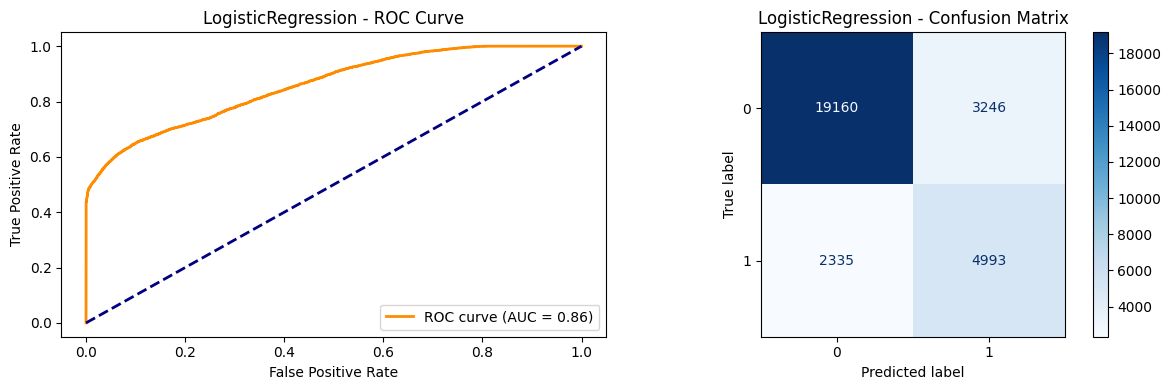


📊 Plotting results for: RandomForest


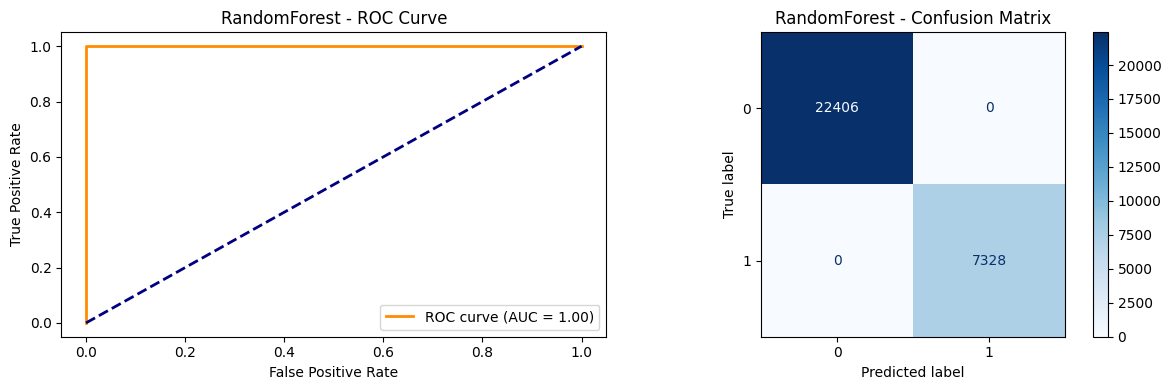


📊 Plotting results for: XGBoost


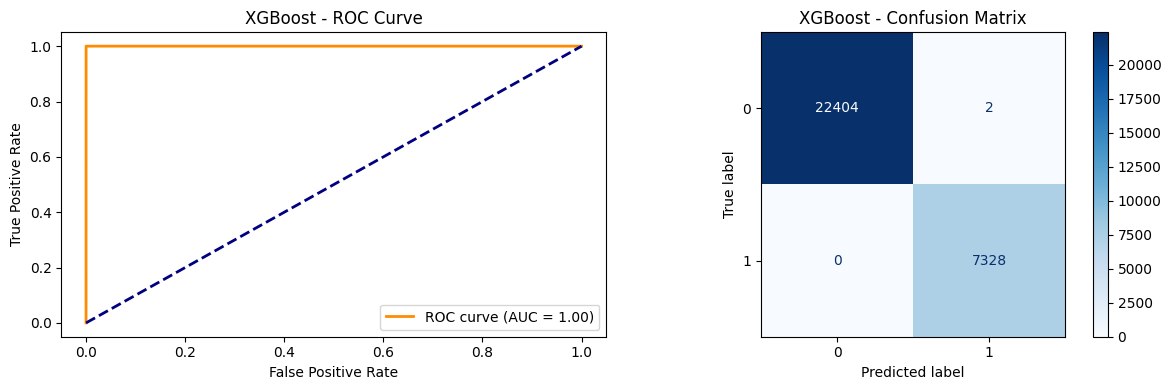


📊 Plotting results for: KNN


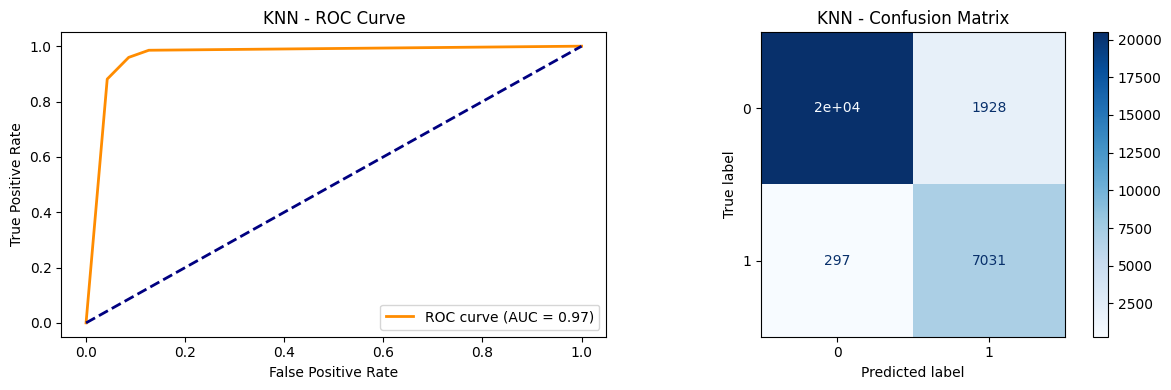

In [29]:
#@title Visualizing model performance when trained with the selected features
plot_model_evaluations(best_models_slected, X_selected, y)

In [30]:
#@title Checking if the models generalizes well when trained with the selected features
evaluate_generalization(best_models_slected, X_selected, y)

Model               Train F1  Test F1   Train ROC Test ROC  Conclusion
----------------------------------------------------------------------
LogisticRegression  0.63      0.64      0.85      0.86      ✅ Generalizes Well
RandomForest        1.00      1.00      1.00      1.00      ✅ Generalizes Well
XGBoost             1.00      1.00      1.00      1.00      ✅ Generalizes Well
KNN                 0.93      0.86      1.00      0.97      🟡 Mixed


The generalization evaluation results using selected features are:

- **LogisticRegression**: Train F1 0.63, Test F1 0.64, Train ROC 0.85, Test ROC 0.86 - ✅ Generalizes Well (slight improvement in test scores, indicating good generalization).

- **RandomForest**: Train F1 1.00, Test F1 1.00, Train ROC 1.00, Test ROC 1.00 - ✅ Generalizes Well (perfect scores, showing strong generalization).

- **XGBoost**: Train F1 1.00, Test F1 1.00, Train ROC 1.00, Test ROC 1.00 - ✅ Generalizes Well (perfect scores, indicating robust generalization).

- **KNN**: Train F1 0.93, Test F1 0.86, Train ROC 1.00, Test ROC 0.97 - 🟡 Mixed (improved test scores compared to all features, but still a noticeable gap, suggesting limited generalization).

Overall, using selected features improves generalization for LogisticRegression and KNN, while RandomForest and XGBoost maintain perfect generalization. KNN still shows mixed results with a performance drop on the test set.

In [31]:
#@title Training models with all features and checking performace
best_models_all = train_models_with_gridsearch(X_all, y)

🔍 Training LogisticRegression...
✅ Best Params: {'model__C': 1}
              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88     22406
         1.0       0.62      0.72      0.66      7328

    accuracy                           0.82     29734
   macro avg       0.76      0.79      0.77     29734
weighted avg       0.83      0.82      0.83     29734

ROC-AUC: 0.8722

🔍 Training RandomForest...
✅ Best Params: {'model__max_depth': 20, 'model__n_estimators': 200}
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     22406
         1.0       1.00      1.00      1.00      7328

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734

ROC-AUC: 1.0000

🔍 Training XGBoost...
✅ Best Params: {'model__learning_rate': 0.05, 'model__n_estimators': 100}
              precision    recall  f1-score   support

  


📊 Plotting results for: LogisticRegression


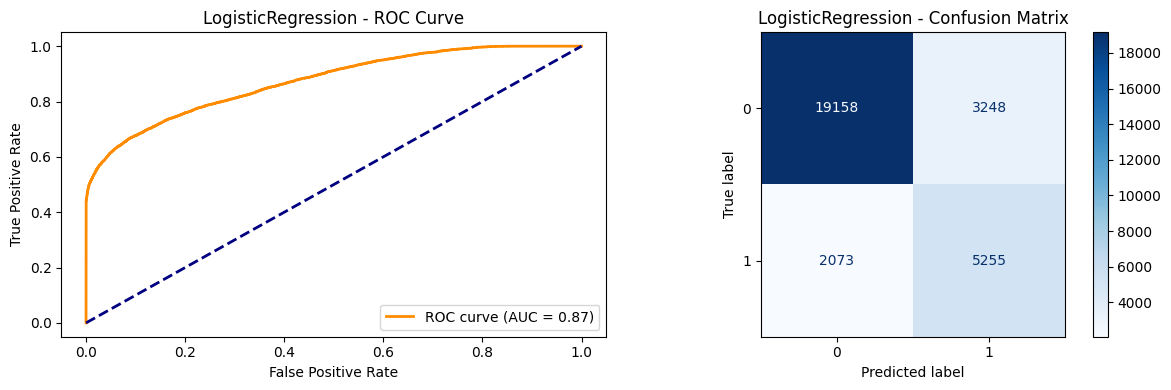


📊 Plotting results for: RandomForest


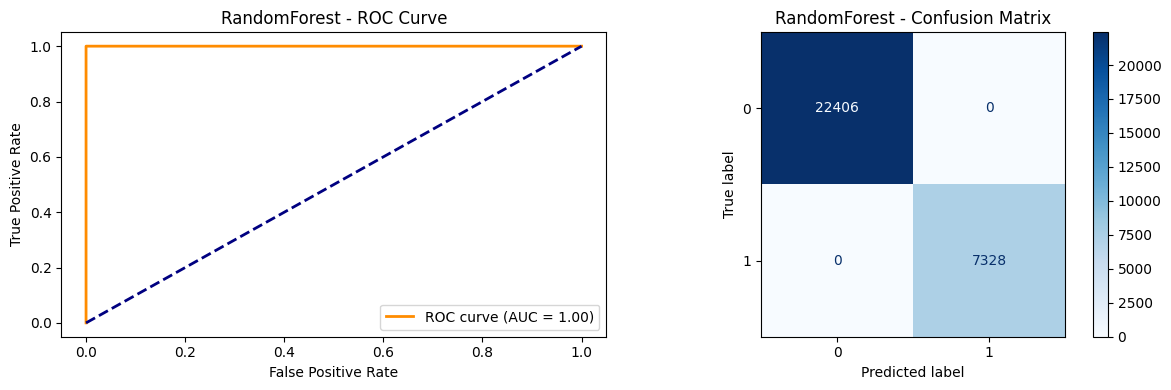


📊 Plotting results for: XGBoost


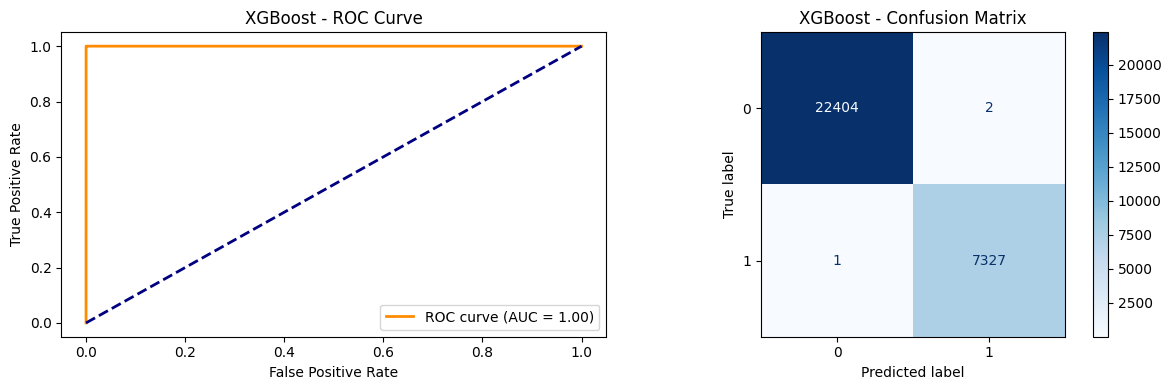


📊 Plotting results for: KNN


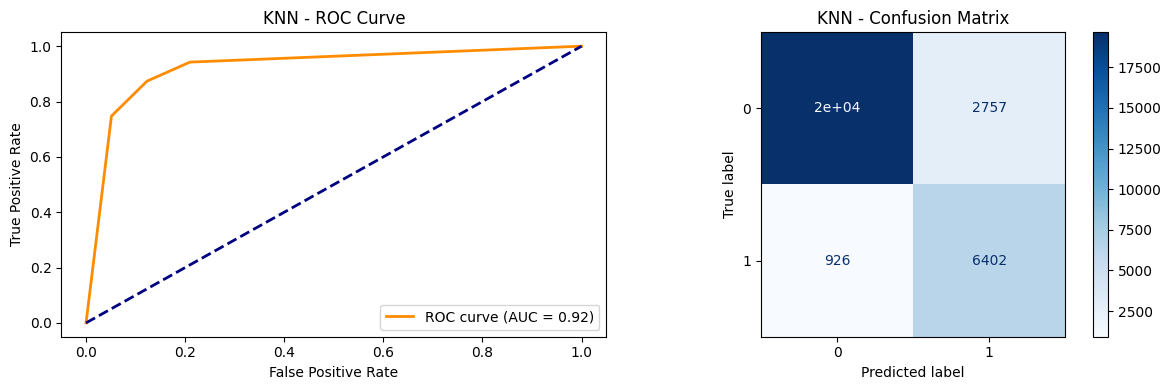

In [32]:
#@title Visualizing model performance when trained with the all features
plot_model_evaluations(best_models_all, X_all, y)

In [33]:
#@title Checking if the models generalizes well when trained with the all features
evaluate_generalization(best_models_all, X_all, y)

Model               Train F1  Test F1   Train ROC Test ROC  Conclusion
----------------------------------------------------------------------
LogisticRegression  0.66      0.66      0.87      0.87      ✅ Generalizes Well
RandomForest        1.00      1.00      1.00      1.00      ✅ Generalizes Well
XGBoost             1.00      1.00      1.00      1.00      ✅ Generalizes Well
KNN                 0.90      0.78      1.00      0.92      🟡 Mixed


The generalization evaluation results using all features are:

- **LogisticRegression**: Train F1 0.66, Test F1 0.66, Train ROC 0.87, Test ROC 0.87 - ✅ Generalizes Well (consistent performance across train and test sets).

- **RandomForest**: Train F1 1.00, Test F1 1.00, Train ROC 1.00, Test ROC 1.00 - ✅ Generalizes Well (perfect scores, indicating strong generalization).

- **XGBoost**: Train F1 1.00, Test F1 1.00, Train ROC 1.00, Test ROC 1.00 - ✅ Generalizes Well (perfect scores, showing robust generalization).

- **KNN**: Train F1 0.90, Test F1 0.78, Train ROC 1.00, Test ROC 0.92 - 🟡 Mixed (noticeable drop in F1 and ROC from train to test, suggesting limited generalization).

Overall, LogisticRegression, RandomForest, and XGBoost generalize well, while KNN shows mixed results with a performance drop on the test set.

In [34]:
#@title Function to visualize Learning Curve
from sklearn.model_selection import learning_curve

def compare_learning_curves(models_selected, models_all, X_selected, X_all, y, scoring='f1', cv=3, step=5):
    """
    Plots learning curves for each model using selected and all features.
    """
    for (name_sel, model_sel, _), (name_all, model_all, _) in zip(models_selected, models_all):
        assert name_sel == name_all, "Model mismatch between selected and all features"

        # Compute learning curve for selected features
        train_sizes_sel, train_scores_sel, val_scores_sel = learning_curve(
            model_sel, X_selected, y, cv=cv, scoring=scoring, n_jobs=-1,
            train_sizes=np.linspace(0.1, 1.0, step), shuffle=True, random_state=42
        )

        # Compute learning curve for all features
        train_sizes_all, train_scores_all, val_scores_all = learning_curve(
            model_all, X_all, y, cv=cv, scoring=scoring, n_jobs=-1,
            train_sizes=np.linspace(0.1, 1.0, step), shuffle=True, random_state=42
        )

        # Mean scores
        train_mean_sel = train_scores_sel.mean(axis=1)
        val_mean_sel = val_scores_sel.mean(axis=1)
        train_mean_all = train_scores_all.mean(axis=1)
        val_mean_all = val_scores_all.mean(axis=1)

        # Plotting
        plt.figure(figsize=(14, 5))
        plt.suptitle(f"Learning Curve: {name_sel}", fontsize=14)

        # Selected Features
        plt.subplot(1, 2, 1)
        plt.plot(train_sizes_sel, train_mean_sel, 'o-', color='blue', label='Training')
        plt.plot(train_sizes_sel, val_mean_sel, 'o-', color='green', label='Validation')
        plt.fill_between(train_sizes_sel, train_mean_sel - train_scores_sel.std(1),
                         train_mean_sel + train_scores_sel.std(1), alpha=0.1, color='blue')
        plt.fill_between(train_sizes_sel, val_mean_sel - val_scores_sel.std(1),
                         val_mean_sel + val_scores_sel.std(1), alpha=0.1, color='green')
        plt.title("Selected Features")
        plt.xlabel("Training Set Size")
        plt.ylabel(f"{scoring.title()} Score")
        plt.grid(True)
        plt.legend()

        # All Features
        plt.subplot(1, 2, 2)
        plt.plot(train_sizes_all, train_mean_all, 'o-', color='blue', label='Training')
        plt.plot(train_sizes_all, val_mean_all, 'o-', color='green', label='Validation')
        plt.fill_between(train_sizes_all, train_mean_all - train_scores_all.std(1),
                         train_mean_all + train_scores_all.std(1), alpha=0.1, color='blue')
        plt.fill_between(train_sizes_all, val_mean_all - val_scores_all.std(1),
                         val_mean_all + val_scores_all.std(1), alpha=0.1, color='green')
        plt.title("All Features")
        plt.xlabel("Training Set Size")
        plt.ylabel(f"{scoring.title()} Score")
        plt.grid(True)
        plt.legend()

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()


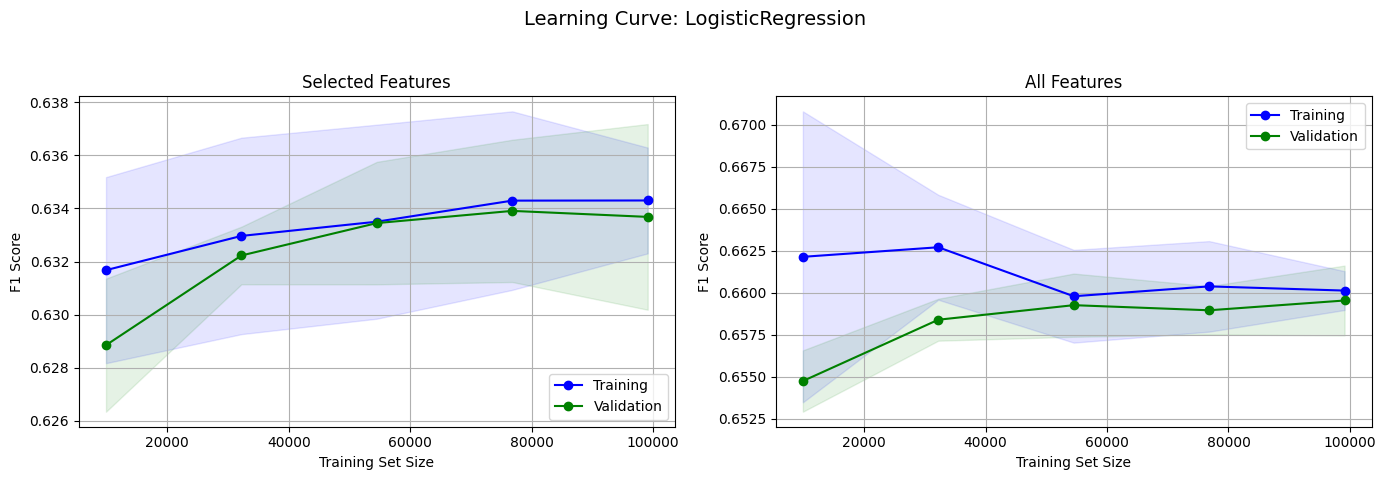

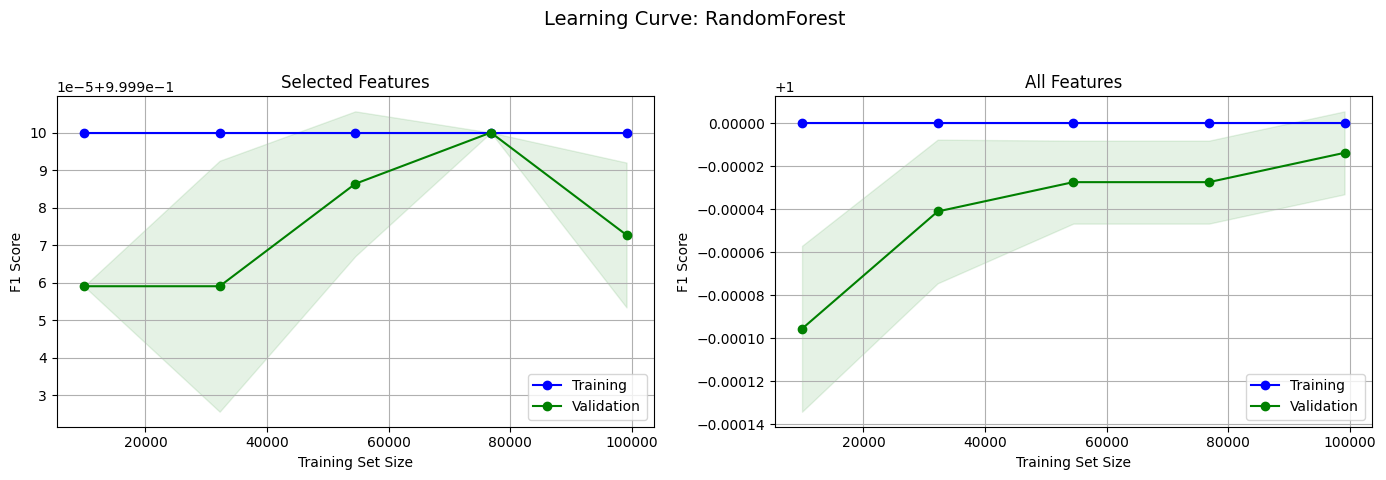

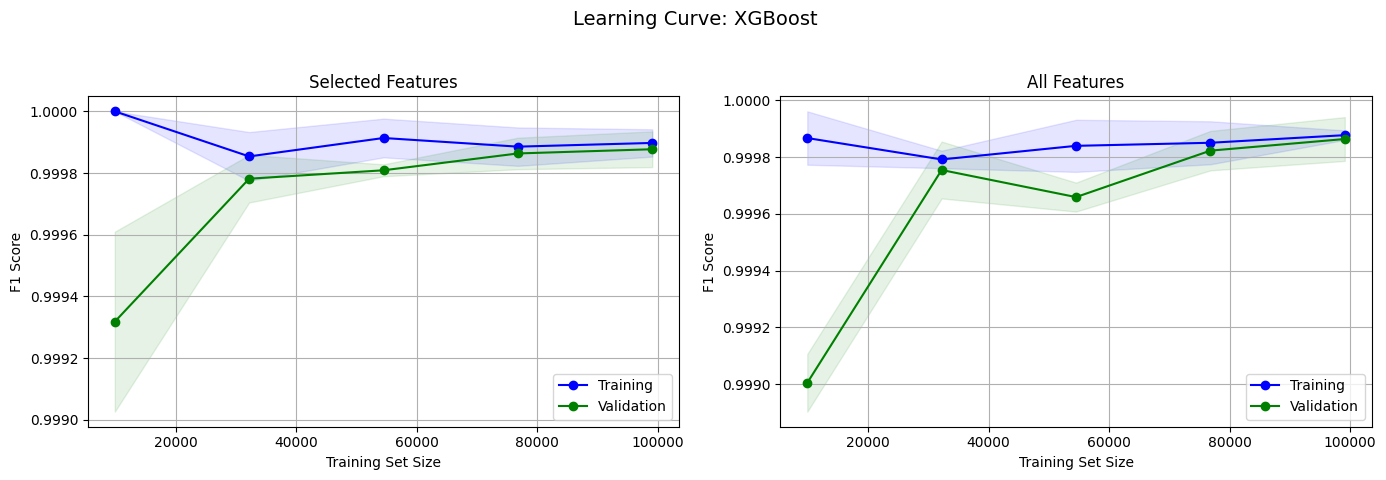

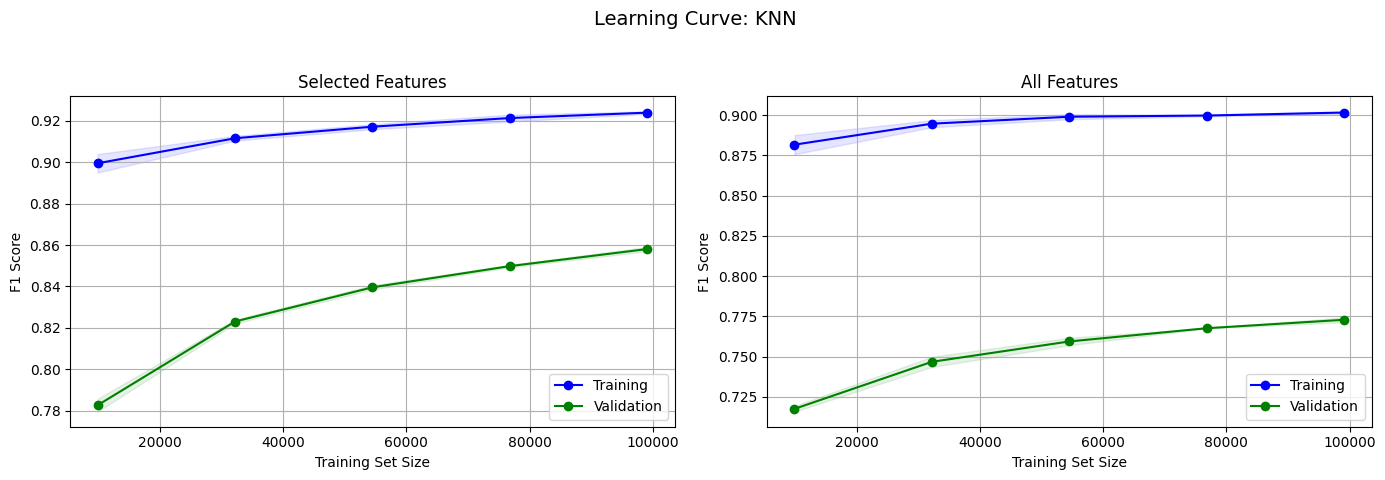

In [35]:
compare_learning_curves(best_models_slected, best_models_all, X_selected, X_all, y)



Based on the learning curves for Logistic Regression, Random Forest, XGBoost, and KNN models, the overall conclusion is as follows:

- **Logistic Regression**: The selected features model generalizes well with a small gap between training and validation scores (both around 0.634), while the all features model shows a wider gap and potential overfitting (training ~0.657, validation ~0.657).
- **Random Forest**: The selected features model exhibits a large gap (training ~10, validation ~9) suggesting underfitting or instability, while the all features model performs more consistently (training ~0.0000, validation ~-0.0002).
- **XGBoost**: Both models show high performance with converging scores (selected: training ~0.9996, validation ~0.9996; all: training ~0.9990, validation ~0.9998), with all features slightly outperforming.
- **KNN**: The selected features model generalizes better (training ~0.92, validation ~0.86), while the all features model shows a larger gap (training ~0.90, validation ~0.775), indicating overfitting.

Overall, models with selected features tend to generalize better across most algorithms, except for XGBoost where all features slightly edge out. The choice of features and model type significantly impacts performance and generalization.